<a href="https://colab.research.google.com/github/HarshadaRaut234/Predicton-of-DR-using-XAI-and-CNN/blob/main/Copy_of_DRprediction_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the ZIP file in Google Drive
zip_file_path = '/content/drive/MyDrive/archive.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_images')

# Count images in each folder (class)
class_counts = {}
for folder_name in os.listdir('/content/extracted_images/dr_unified_v2/dr_unified_v2/train'):
    folder_path = os.path.join('/content/extracted_images/dr_unified_v2/dr_unified_v2/train', folder_name)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        class_counts[folder_name] = num_images

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f'Class {class_name}: {count} images')

# Clean up extracted files (optional)
# os.remove(zip_file_path)
# os.rmdir('/content/extracted_images')


Class 0: 55162 images
Class 2: 12119 images
Class 4: 2002 images
Class 3: 1006 images
Class 1: 3706 images


In [ ]:
import shutil
import random
import os

# Define paths
source_dir = '/content/extracted_images/dr_unified_v2/dr_unified_v2/train'
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

# Create directories for train, validation, and test data
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split data into train, validation, and test sets
def split_data(class_folder):
    class_images = os.listdir(class_folder)
    random.shuffle(class_images)  # Shuffle images
    num_images = len(class_images)

    train_split = int(0.7 * num_images)
    val_split = int(0.15 * num_images)
    test_split = num_images - train_split - val_split

    train_images = class_images[:train_split]
    val_images = class_images[train_split:train_split + val_split]
    test_images = class_images[train_split + val_split:]

    return train_images, val_images, test_images

# Loop through class folders and split data
for class_folder in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_folder)
    if os.path.isdir(class_path):
        # Create class directories in train, validation, and test folders
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

        # Split data for the class
        train_images, val_images, test_images = split_data(class_path)

        # Copy images to respective directories
        for image in train_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_folder, image))
        for image in val_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_folder, image))
        for image in test_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_folder, image))

print("Data split into train, validation, and test sets with folders named 'train', 'val', and 'test'.")


Data split into train, validation, and test sets with folders named 'train', 'val', and 'test'.


In [ ]:
import os

data_dir = '/content/train'  # Update with your data directory path

# Iterate through each class folder
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_folder_path):
        num_images = len(os.listdir(class_folder_path))
        print(f'Class {class_folder}: {num_images} images')


Class 0: 38613 images
Class 2: 8483 images
Class 4: 1401 images
Class 3: 704 images
Class 1: 2594 images


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Define the target number of samples for each class
target_num_samples = 5000

# Define the target size for the images (e.g., 224x224 pixels)
img_size = (224, 224)

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def upsample_class(class_dir, target_num_samples):
    # Load all images in the class directory
    class_images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    current_num_samples = len(class_images)

    for i in range(target_num_samples - current_num_samples):
        img_path = os.path.join(class_dir, class_images[i % current_num_samples])
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Generate a batch of augmented images
        aug_iter = datagen.flow(img_array, batch_size=1)
        aug_img = next(aug_iter)[0].astype('uint8')

        # Save the augmented image
        new_img_path = os.path.join(class_dir, f'aug_{i}.jpg')
        save_img(new_img_path, aug_img)

    print(f'Upsampled class {os.path.basename(class_dir)} to {target_num_samples} images.')

# Define the directories for classes 1, 3, and 4
class_dirs = ['/content/train/1', '/content/train/3', '/content/train/4']

# Perform upsampling for each class
for class_dir in class_dirs:
    upsample_class(class_dir, target_num_samples)


Upsampled class 1 to 5000 images.
Upsampled class 3 to 5000 images.
Upsampled class 4 to 5000 images.


In [ ]:
import os

data_dir = '/content/train'  # Update with your data directory path

# Iterate through each class folder
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_folder_path):
        num_images = len(os.listdir(class_folder_path))
        print(f'Class {class_folder}: {num_images} images')


Class 0: 38613 images
Class 2: 8483 images
Class 4: 5000 images
Class 3: 5000 images
Class 1: 5000 images


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2

# Define constants
img_size = (224, 224)
batch_size = 32  # Increased batch size
epochs = 10

# Function to create a repeating subset generator
def subset_generator(generator, subset_size):
    def subset_gen():
        count = 0
        while True:  # Repeat indefinitely
            for x, y in generator:
                yield x, y
                count += 1
                if count >= subset_size:
                    count = 0  # Reset count after reaching subset_size
                    break
    return subset_gen

# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(5, activation='softmax')(x)  # Adjust the number of classes as needed

# Create model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with an adjusted learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and testing (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Define data generators with increased batch size
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    '/content/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    '/content/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for test data
)

# Subset size for faster training (e.g., 500 steps per epoch)
subset_size = 500
train_subset_gen = subset_generator(train_generator, subset_size)
val_subset_gen = subset_generator(val_generator, subset_size)

# Learning rate reduction
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Train the model with subset data
history = model.fit(train_subset_gen(), epochs=epochs, validation_data=val_subset_gen(), steps_per_epoch=subset_size, validation_steps=subset_size, callbacks=[lr_reduction])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')


9406464/9406464 [==============================] - 0s 0us/step
Found 62096 images belonging to 5 classes.
Found 11096 images belonging to 5 classes.
Found 11104 images belonging to 5 classes.
Epoch 1/10
500/500 [==============================] - 285s 507ms/step - loss: 0.9494 - accuracy: 0.6726 - val_loss: 1.7115 - val_accuracy: 0.7452 - lr: 1.0000e-04
Epoch 2/10
500/500 [==============================] - 262s 526ms/step - loss: 0.7960 - accuracy: 0.7188 - val_loss: 1.8940 - val_accuracy: 0.7476 - lr: 1.0000e-04
Epoch 3/10
500/500 [==============================] - 248s 496ms/step - loss: 0.7520 - accuracy: 0.7337 - val_loss: 1.4645 - val_accuracy: 0.7586 - lr: 1.0000e-04
Epoch 4/10
500/500 [==============================] - 259s 519ms/step - loss: 0.7301 - accuracy: 0.7414 - val_loss: 1.2009 - val_accuracy: 0.7656 - lr: 1.0000e-04
Epoch 5/10
500/500 [==============================] - 256s 512ms/step - loss: 0.6983 - accuracy: 0.7540 - val_loss: 1.1872 - val_accuracy: 0.7716 - lr: 1.00

In [ ]:
pip install shap


In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import shap

# Load the saved model
model_path = '/content/drive/MyDrive/saved_model'  # Adjust the path to your saved model
loaded_model = tf.keras.models.load_model(model_path)

# Path to the image
img_dir = '/content/test/4'
img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
random_img_file = random.choice(img_files)
img_path = os.path.join(img_dir, random_img_file)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
preprocessed_img = preprocess_input(np.expand_dims(img_array, axis=0))  # Use MobileNetV2 preprocessing

# Make a prediction
predictions = loaded_model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(f'Predicted class: {predicted_class}')

# Define a function to preprocess and predict
def model_predict_fn(inputs):
    preprocessed_inputs = preprocess_input(inputs)
    predictions = loaded_model.predict(preprocessed_inputs)
    return predictions

# Prepare a background dataset (use a representative subset of your data)
background_data = np.random.rand(100, 224, 224, 3)  # Example background data
background_data = preprocess_input(background_data)

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(model_predict_fn, background_data)

# Prepare SHAP input (ensure it is correctly shaped)
shap_input = np.expand_dims(np.squeeze(preprocessed_img, axis=0), axis=0)  # Add batch dimension

# Check shapes for debugging
print("Shape of shap_input:", shap_input.shape)
print("Shape of background_data:", background_data.shape)

# Compute SHAP values
try:
    shap_values = explainer.shap_values(shap_input, nsamples=100)  # Add batch dimension
    # Visualize the SHAP values (example plot)
    shap.image_plot(shap_values, [np.squeeze(shap_input, axis=0)])
except Exception as e:
    print("Error computing SHAP values:", e)


1/1 [==============================] - 1s 915ms/step
Predicted class: [4]
4/4 [==============================] - 0s 46ms/step
Shape of shap_input: (1, 224, 224, 3)
Shape of background_data: (100, 224, 224, 3)
Error computing SHAP values: Instance must have 1 or 2 dimensions!


In [ ]:
pip install lime matplotlib tensorflow numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=c7d545e6f6adaaeee4a4fbb000e8750d6a83e1ebd4b9d344579d6619e193bb40
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


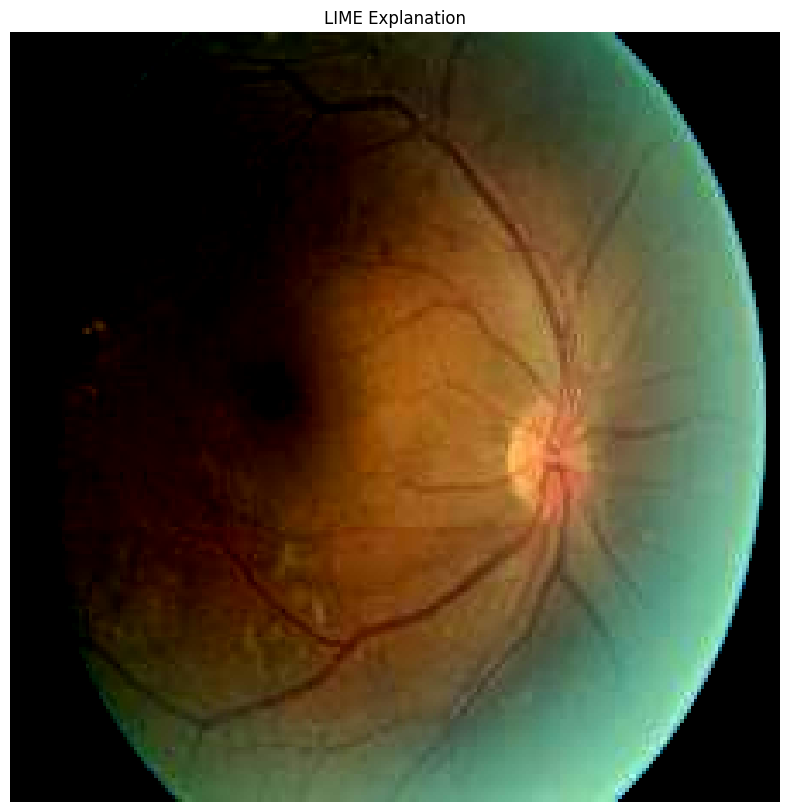

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import lime
import lime.lime_image
import matplotlib.pyplot as plt
import os
import random

# Load the saved model
model_path = '/content/drive/MyDrive/saved_model'  # Adjust the path to your saved model
loaded_model = tf.keras.models.load_model(model_path)

# Path to the image
img_dir = '/content/test/4'
img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
random_img_file = random.choice(img_files)
img_path = os.path.join(img_dir, random_img_file)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(img_array)  # Use MobileNetV2 preprocessing

# Define a function to make predictions
def model_predict_fn_lime(inputs):
    return loaded_model.predict(inputs)

# Create the LIME image explainer
explainer = lime.lime_image.LimeImageExplainer()

# Prepare the input image (ensure it has the correct shape)
shap_input = np.squeeze(preprocessed_img, axis=0)  # Remove batch dimension
shap_input = shap_input[np.newaxis, ...]  # Add batch dimension for LIME

# Explain a prediction
explanation = explainer.explain_instance(shap_input[0], model_predict_fn_lime, top_labels=5, hide_color=0, num_samples=1000)

# Visualize the explanation for the predicted class
predicted_class = np.argmax(loaded_model.predict(shap_input))
temp, mask = explanation.get_image_and_mask(label=predicted_class, positive_only=True, num_features=10, hide_rest=False)

# Display the image with LIME explanation
plt.figure(figsize=(10, 10))
plt.imshow(temp)
plt.title("LIME Explanation")
plt.axis('off')
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 33ms/step


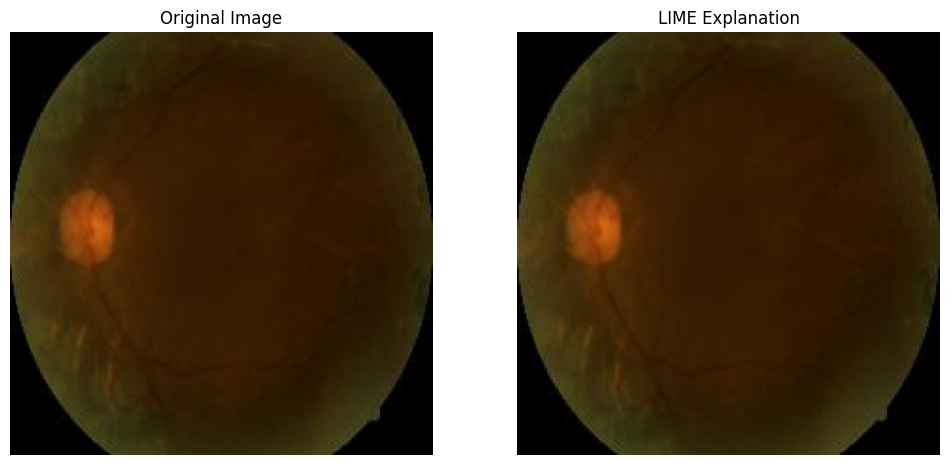

Explanation for class 4:
Feature 1: importance 0.0756
Feature 9: importance 0.0621
Feature 20: importance 0.0220
Feature 5: importance 0.0206
Feature 4: importance 0.0199
Feature 14: importance -0.0174
Feature 6: importance 0.0147
Feature 28: importance 0.0143
Feature 19: importance 0.0143
Feature 3: importance 0.0139
Feature 18: importance 0.0138
Feature 17: importance 0.0124
Feature 12: importance 0.0121
Feature 26: importance 0.0119
Feature 30: importance 0.0100
Feature 24: importance 0.0097
Feature 29: importance -0.0094
Feature 0: importance 0.0090
Feature 22: importance 0.0078
Feature 21: importance 0.0075
Feature 25: importance 0.0073
Feature 2: importance 0.0058
Feature 27: importance 0.0057
Feature 13: importance 0.0051
Feature 10: importance 0.0050
Feature 16: importance 0.0043
Feature 7: importance 0.0041
Feature 8: importance 0.0022
Feature 11: importance -0.0014
Feature 23: importance 0.0006
Feature 15: importance 0.0001


In [ ]:
import numpy as np
import tensorflow as tf
import lime
import lime.lime_image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the model
model_path = '/content/drive/MyDrive/saved_model'
loaded_model = tf.keras.models.load_model(model_path)

# Define model prediction function for LIME
def model_predict_fn(images):
    # Make predictions
    images = np.array(images)
    predictions = loaded_model.predict(images)
    return predictions

# Load and preprocess an image
img_dir = '/content/test/4'
img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
random_img_file = random.choice(img_files)
img_path = os.path.join(img_dir, random_img_file)

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Initialize LIME ImageExplainer
explainer = lime.lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(img_array[0], model_predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Get the explanation for the top predicted class
top_label = np.argmax(loaded_model.predict(img_array))
explanation_image, explanation_mask = explanation.get_image_and_mask(top_label, positive_only=True, num_features=10, hide_rest=False)

# Display the explanation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_array[0])
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(explanation_image)
ax[1].set_title('LIME Explanation')
ax[1].axis('off')

plt.show()

# Display the explanation weights for regions
print(f"Explanation for class {top_label}:")
for feature in explanation.local_exp[top_label]:
    print(f"Feature {feature[0]}: importance {feature[1]:.4f}")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 36ms/step


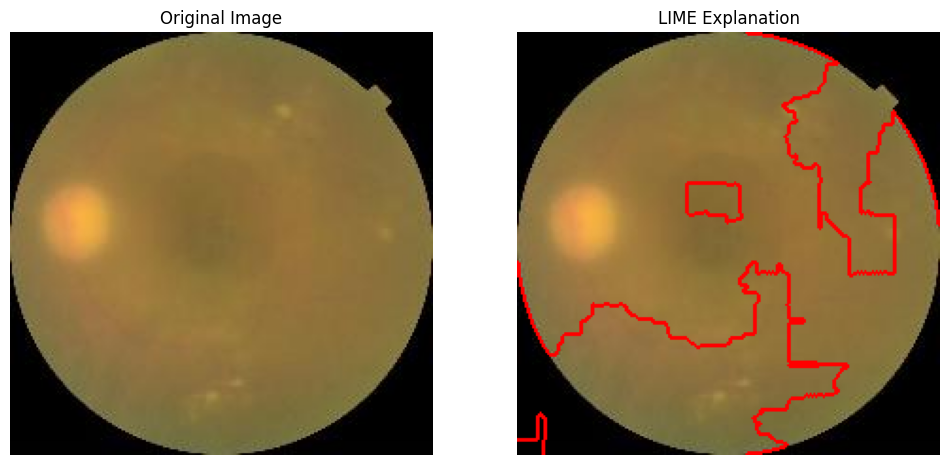

Explanation for class 2:
Feature 27: importance 0.0612
Feature 24: importance 0.0519
Feature 33: importance 0.0502
Feature 0: importance 0.0440
Feature 8: importance -0.0380
Feature 28: importance 0.0372
Feature 23: importance -0.0336
Feature 30: importance 0.0328
Feature 9: importance 0.0232
Feature 15: importance 0.0214
Feature 7: importance 0.0204
Feature 12: importance 0.0172
Feature 3: importance 0.0153
Feature 29: importance 0.0151
Feature 32: importance 0.0137
Feature 14: importance 0.0120
Feature 1: importance 0.0112
Feature 6: importance -0.0109
Feature 17: importance -0.0097
Feature 22: importance 0.0064
Feature 13: importance 0.0063
Feature 31: importance 0.0063
Feature 19: importance 0.0061
Feature 5: importance 0.0059
Feature 2: importance 0.0043
Feature 26: importance -0.0039
Feature 25: importance -0.0035
Feature 10: importance 0.0032
Feature 4: importance 0.0031
Feature 11: importance -0.0027
Feature 20: importance -0.0027
Feature 18: importance 0.0023
Feature 21: impor

In [ ]:
import numpy as np
import tensorflow as tf
import lime
import lime.lime_image
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image
from skimage.segmentation import mark_boundaries

# Load the model
model_path = '/content/drive/MyDrive/saved_model'
loaded_model = tf.keras.models.load_model(model_path)

# Define model prediction function for LIME
def model_predict_fn(images):
    images = np.array(images)
    predictions = loaded_model.predict(images)
    return predictions

# Load and preprocess an image
img_dir = '/content/test/2'
img_files = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]
random_img_file = random.choice(img_files)
img_path = os.path.join(img_dir, random_img_file)

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Initialize LIME ImageExplainer
explainer = lime.lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(img_array[0], model_predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Get the explanation for the top predicted class
top_label = np.argmax(loaded_model.predict(img_array))
explanation_image, explanation_mask = explanation.get_image_and_mask(top_label, positive_only=True, num_features=10, hide_rest=False)

# Convert the explanation mask to a binary mask and apply it to the original image
binary_mask = np.array(explanation_mask > 0.5, dtype=np.uint8)  # Threshold mask
highlighted_img = mark_boundaries(img_array[0], binary_mask, color=(1, 0, 0), mode='overlay')

# Display the original image and LIME explanation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original Image
ax[0].imshow(img_array[0])
ax[0].set_title('Original Image')
ax[0].axis('off')

# LIME Explanation
ax[1].imshow(highlighted_img)
ax[1].set_title('LIME Explanation')
ax[1].axis('off')

plt.show()

# Display the explanation weights for regions
print(f"Explanation for class {top_label}:")
for feature in explanation.local_exp[top_label]:
    print(f"Feature {feature[0]}: importance {feature[1]:.4f}")


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Found 11104 images belonging to 5 classes.
347/347 [==============================] - 29s 73ms/step


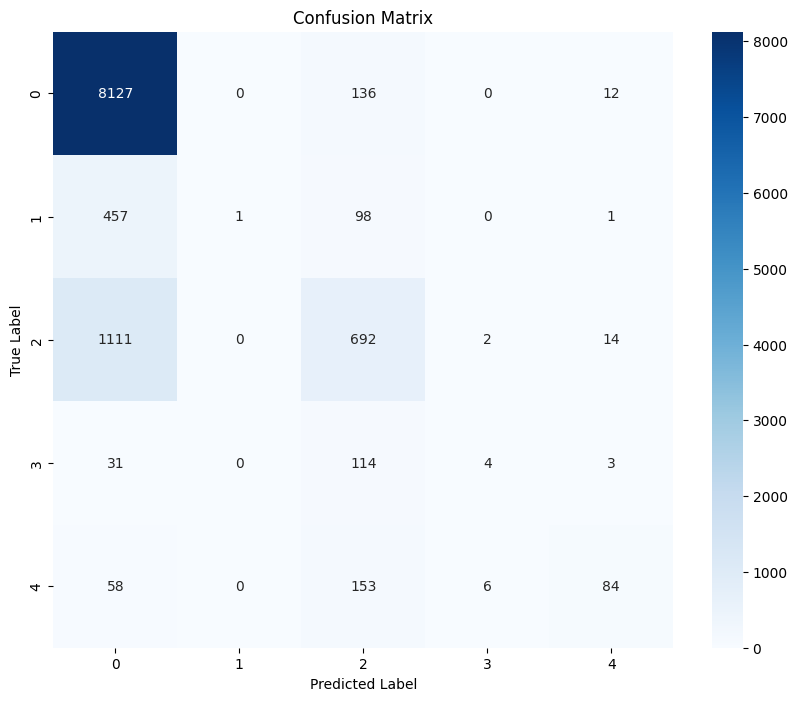

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      8275
           1       1.00      0.00      0.00       557
           2       0.58      0.38      0.46      1819
           3       0.33      0.03      0.05       152
           4       0.74      0.28      0.40       301

    accuracy                           0.80     11104
   macro avg       0.70      0.33      0.36     11104
weighted avg       0.79      0.80      0.76     11104



In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
model_path = '/content/drive/MyDrive/saved_model'  # Adjust the path to your saved model
model = tf.keras.models.load_model(model_path)

# Define test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/test',  # Path to the test data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No shuffling for test data
)

# Predict the classes using the trained model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test generator
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))
